# Review the fit results from `sncosmo`

Authors: Midori Rollins and Melissa Graham

Create and examine the distributions for the fit parameters `z`, `t0`, `x0`, `x1`, and `c`.

Do this for all the potential SNIa, and only the unflagged light curves.

Review the light curves for potential SNIa that have outlier fit parameters.

Save plots to `3_review_potential_snia/`.

## Set up and read in data

Import packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

Read in the `sncosmo` results.

The fit peak magnitudes are read in but not used in this notebook.

In [2]:
fnm = '2_all_potential_snia_fits/results_sncosmos.dat'
fit_cand = np.loadtxt(fnm, dtype='str', usecols=(0))
fit_est_z = np.loadtxt(fnm, dtype='float', usecols=(1))
fit_in_zlo = np.loadtxt(fnm, dtype='float', usecols=(2))
fit_in_zhi = np.loadtxt(fnm, dtype='float', usecols=(3))
fit_z = np.loadtxt(fnm, dtype='float', usecols=(4))
fit_ze = np.loadtxt(fnm, dtype='float', usecols=(5))
fit_t0 = np.loadtxt(fnm, dtype='float', usecols=(6))
fit_t0e = np.loadtxt(fnm, dtype='float', usecols=(7))
fit_x0 = np.loadtxt(fnm, dtype='float', usecols=(8))
fit_x0e = np.loadtxt(fnm, dtype='float', usecols=(9))
fit_x1 = np.loadtxt(fnm, dtype='float', usecols=(10))
fit_x1e = np.loadtxt(fnm, dtype='float', usecols=(11))
fit_c = np.loadtxt(fnm, dtype='float', usecols=(12))
fit_ce = np.loadtxt(fnm, dtype='float', usecols=(13))
fit_pmB = np.loadtxt(fnm, dtype='float', usecols=(14))
fit_pmg = np.loadtxt(fnm, dtype='float', usecols=(15))
fit_pmr = np.loadtxt(fnm, dtype='float', usecols=(16))
fit_pmi = np.loadtxt(fnm, dtype='float', usecols=(17))
del fnm

In [3]:
tx = np.where(fit_z <= 0.)[0]
print('Number of potential SNIa which were not fit by sncosmo: ', len(tx))
del tx
tx = np.where(fit_z > 0)[0]
print('Number of SNIa that were fit with sncosmo: ', len(tx))
del tx

Number of potential SNIa which were not fit by sncosmo:  0
Number of SNIa that were fit with sncosmo:  100


In [4]:
fnm = '2_all_potential_snia_fits/MLG_review_ratings.txt'
mlg_review_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
mlg_review_flag = np.loadtxt(fnm, dtype='int', usecols=(1))
del fnm

In [5]:
fit_mlgflag = np.zeros(len(fit_cand), dtype='int') - 1
for c, candid in enumerate(fit_cand):
    tx = np.where(candid == mlg_review_candid)[0]
    if len(tx) == 1:
        fit_mlgflag[c] = mlg_review_flag[tx[0]]
    del tx

In [6]:
fnm = '2_all_potential_snia_fits/MR_review_ratings.txt'
mr_rating_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
mr_rating_flag   = np.loadtxt(fnm, dtype='int', usecols=(1))
del fnm

In [7]:
fit_mrflag = np.zeros(len(fit_cand), dtype='int') - 1
for c, candid in enumerate(fit_cand):
    tx = np.where(candid == mr_rating_candid)[0]
    if len(tx) == 1:
        fit_mrflag[c] = mr_rating_flag[tx[0]]
    del tx

## Explore the estimated and fit redshifts

The fit redshifts are usually lower than the estimated redshifts.

This makes sense since an intrinsic magnitude of -19.3 was used
to estimate the redshifts, and that will generally be an 
overestimate for host-reddedning SNIa and for non-SNIa that
are being included here.

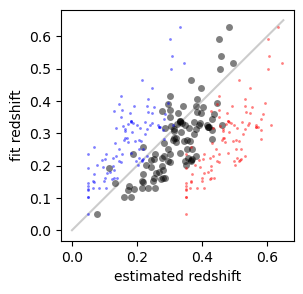

In [8]:
fig = plt.figure(figsize=(3, 3))
tx = np.where(fit_z > 0)[0]
plt.plot([0.0, 0.65], [0.0, 0.65], alpha=0.4, color='grey')
# plt.axvline(0.05, alpha=0.4, color='grey')
plt.plot(fit_est_z[tx], fit_z[tx], 'o', ms=5, mew=0, alpha=0.5, color='black')
plt.plot(fit_in_zlo[tx], fit_z[tx], 'o', ms=2, mew=0, alpha=0.5, color='blue')
plt.plot(fit_in_zhi[tx], fit_z[tx], 'o', ms=2, mew=0, alpha=0.5, color='red')
plt.xlabel('estimated redshift')
plt.ylabel('fit redshift')
plt.show()

Plot the fit redshifts vs. the uncertainties.

number fit:  66
number unflagged:  34


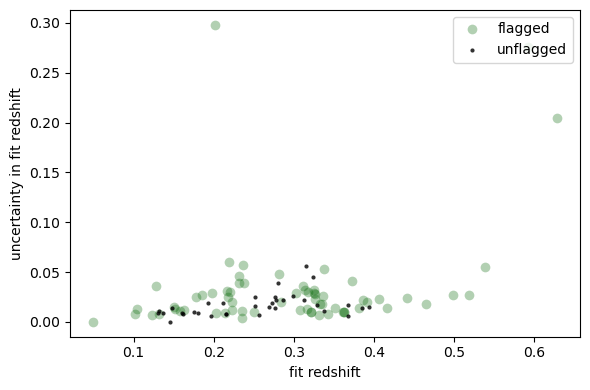

In [9]:
tx = np.where((fit_z > -90.0) & (fit_mlgflag != 0))[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0))[0]
print('number fit: ', len(tx))
print('number unflagged: ', len(mlgx))

fig = plt.figure(figsize=(6, 4))

plt.plot(fit_z[tx],   fit_ze[tx],   'o', ms=7, alpha=0.3, mew=0, color='darkgreen', label='flagged')
plt.plot(fit_z[mlgx], fit_ze[mlgx], 'o', ms=3, alpha=0.8, mew=0, color='black', label='unflagged')
plt.xlabel('fit redshift')
plt.ylabel('uncertainty in fit redshift')
# plt.ylim([-0.01, np.max(fit_ze[tx])])
plt.legend(loc='upper right')
fig.tight_layout()
fig.show()

## Explore the parameter distributions

Plot the parameter distributions for all the fits,
only rejecting fits with parameter values of -99.9, which
is the placeholder for "no fit".

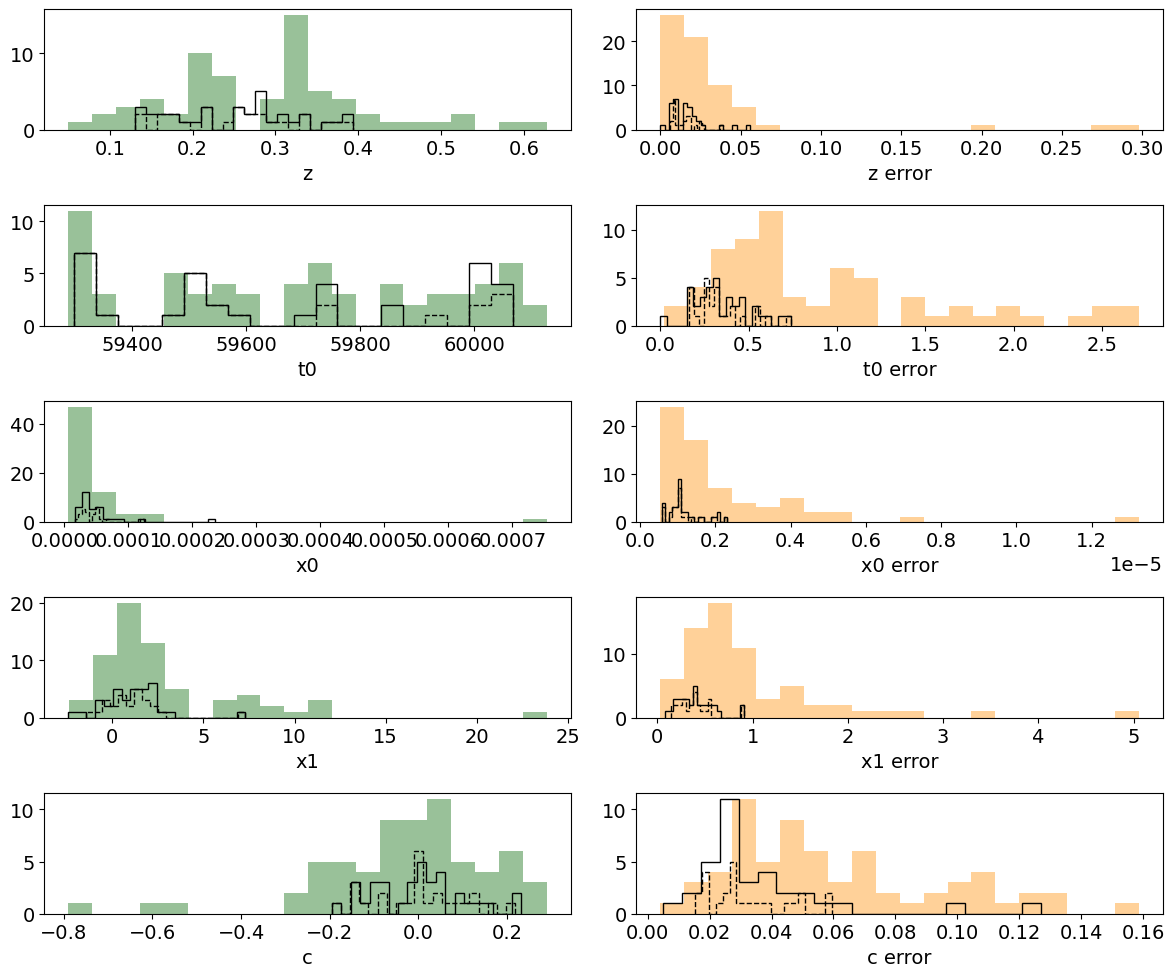

In [10]:
# tx = np.where(fit_z > -90.0)[0]
tx = np.where((fit_z > -90.0) & (fit_mlgflag != 0))[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0))[0]
mrx = np.where((fit_z > -90.0) & (fit_mrflag == 0))[0]

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(5, 2, figsize=(12, 10))
nbins=20

ax[0,0].hist(fit_z[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[0,0].hist(fit_z[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[0,0].hist(fit_z[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[0,0].set_xlabel('z')

ax[0,1].hist(fit_ze[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkorange')
ax[0,1].hist(fit_ze[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[0,1].hist(fit_ze[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[0,1].set_xlabel('z error')

ax[1,0].hist(fit_t0[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[1,0].hist(fit_t0[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[1,0].hist(fit_t0[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[1,0].set_xlabel('t0')

ax[1,1].hist(fit_t0e[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkorange')
ax[1,1].hist(fit_t0e[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[1,1].hist(fit_t0e[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[1,1].set_xlabel('t0 error')

ax[2,0].hist(fit_x0[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[2,0].hist(fit_x0[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[2,0].hist(fit_x0[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[2,0].set_xlabel('x0')

ax[2,1].hist(fit_x0e[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkorange')
ax[2,1].hist(fit_x0e[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[2,1].hist(fit_x0e[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[2,1].set_xlabel('x0 error')

ax[3,0].hist(fit_x1[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[3,0].hist(fit_x1[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[3,0].hist(fit_x1[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[3,0].set_xlabel('x1')

ax[3,1].hist(fit_x1e[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkorange')
ax[3,1].hist(fit_x1e[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[3,1].hist(fit_x1e[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[3,1].set_xlabel('x1 error')

ax[4,0].hist(fit_c[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[4,0].hist(fit_c[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[4,0].hist(fit_c[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[4,0].set_xlabel('c')

ax[4,1].hist(fit_ce[tx],   bins=nbins, histtype='stepfilled', alpha=0.4, color='darkorange')
ax[4,1].hist(fit_ce[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[4,1].hist(fit_ce[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[4,1].set_xlabel('c error')

fig.tight_layout()
fig.show()

Plot scatter plots of the fit parameter values vs. their uncertainties. 

Notice that DC22iykha is an outlier and give it a special symbol.

Create boxes that bound areas where "well-fit SNIa" would lie.

number flagged:  66
number unflagged:  34
0.9676415284897997
0.10569353210968335
flagged in the box:  31
unflagged in the box:  31
in the box:  62


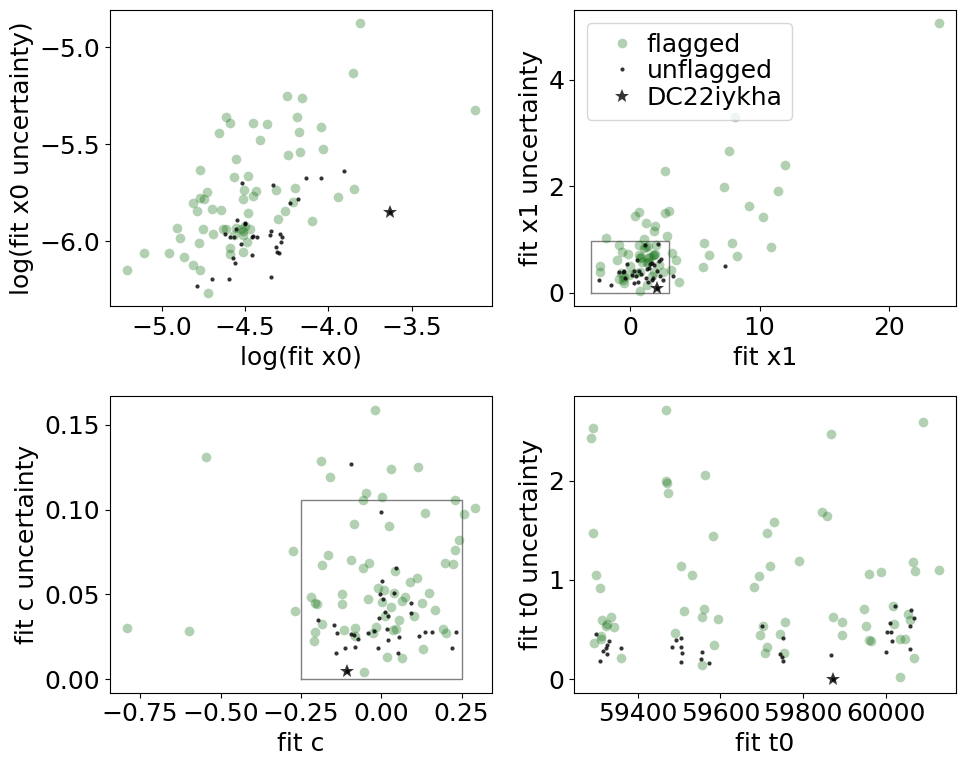

In [15]:
tx = np.where((fit_z > -90.0) & (fit_mlgflag != 0))[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0))[0]
print('number flagged: ', len(tx))
print('number unflagged: ', len(mlgx))

x = np.where(fit_cand[mlgx] == 'DC22iykha')[0]

# regions
tmp = np.where((fit_cand[mlgx] != 'DC22iykha') & (fit_x1[mlgx] >= -3) & (fit_x1[mlgx] <= 3))[0]
val_x1e = np.mean(fit_x1e[mlgx[tmp]]) + 3.0 * np.std(fit_x1e[mlgx[tmp]])
print(val_x1e)
del tmp
tmp = np.where((fit_cand[mlgx] != 'DC22iykha') & (fit_c[mlgx] >= -0.25) & (fit_c[mlgx] <= 0.25))[0]
val_ce = np.mean(fit_ce[mlgx[tmp]]) + 3.0 * np.std(fit_ce[mlgx[tmp]])
print(val_ce)
del tmp

tmp = np.where((fit_x1[tx] >= -3) & (fit_x1[tx] <= 3) & (fit_x1e[tx] >= 0.0) & (fit_x1e[tx] <= val_x1e) & 
               (fit_c[tx] >= -0.25) & (fit_c[tx] <= 0.25) & (fit_ce[tx] >= 0.0) & (fit_ce[tx] <= val_ce) )[0]
print('flagged in the box: ', len(tmp))
tmp = np.where((fit_x1[mlgx] >= -3) & (fit_x1[mlgx] <= 3) & (fit_x1e[mlgx] >= 0.0) & (fit_x1e[mlgx] <= val_x1e) & 
               (fit_c[mlgx] >= -0.25) & (fit_c[mlgx] <= 0.25) & (fit_ce[mlgx] >= 0.0) & (fit_ce[mlgx] <= val_ce) )[0]
print('unflagged in the box: ', len(tmp))
tmp = np.where((fit_x1 >= -3) & (fit_x1 <= 3) & (fit_x1e >= 0.0) & (fit_x1e <= val_x1e) & 
               (fit_c >= -0.25) & (fit_c <= 0.25) & (fit_ce >= 0.0) & (fit_ce <= val_ce) )[0]
print('in the box: ', len(tmp))


plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# plot region boxes for SNIa-like parameters
ax[0,1].plot([-3, 3, 3, -3, -3], [0, 0, val_x1e, val_x1e, 0], lw=1, color='grey')
ax[1,0].plot([-0.25, 0.25, 0.25, -0.25, -0.25], [0, 0, val_ce, val_ce, 0], lw=1, color='grey')

ax[0,0].plot(np.log10(fit_x0[tx]),   np.log10(fit_x0e[tx]),   'o', ms=7, alpha=0.3, mew=0, color='darkgreen', label='flagged')
ax[0,0].plot(np.log10(fit_x0[mlgx]), np.log10(fit_x0e[mlgx]), 'o', ms=3, alpha=0.8, mew=0, color='black', label='unflagged')
ax[0,0].plot(np.log10(fit_x0[mlgx[x]]), np.log10(fit_x0e[mlgx[x]]), '*', ms=10, alpha=0.8, mew=0, color='black', label='DC22iykha')
ax[0,0].set_xlabel('log(fit x0)')
ax[0,0].set_ylabel('log(fit x0 uncertainty)')
# ax[0,0].legend(loc='upper left')

ax[0,1].plot(fit_x1[tx],   fit_x1e[tx],   'o', ms=7, alpha=0.3, mew=0, color='darkgreen', label='flagged')
ax[0,1].plot(fit_x1[mlgx], fit_x1e[mlgx], 'o', ms=3, alpha=0.8, mew=0, color='black', label='unflagged')
ax[0,1].plot(fit_x1[mlgx[x]], fit_x1e[mlgx[x]], '*', ms=10, alpha=0.8, mew=0, color='black', label='DC22iykha')
ax[0,1].set_xlabel('fit x1')
ax[0,1].set_ylabel('fit x1 uncertainty')
# ax[0,1].set_ylim([-0.1, np.max(fit_x1e[tx])])
ax[0,1].legend(loc='upper left', handletextpad=0.0, labelspacing=0.1)

ax[1,0].plot(fit_c[tx],   fit_ce[tx],   'o', ms=7, alpha=0.3, mew=0, color='darkgreen')
ax[1,0].plot(fit_c[mlgx], fit_ce[mlgx], 'o', ms=3, alpha=0.8, mew=0, color='black')
ax[1,0].plot(fit_c[mlgx[x]], fit_ce[mlgx[x]], '*', ms=10, alpha=0.8, mew=0, color='black', label='DC22iykha')
ax[1,0].set_xlabel('fit c')
ax[1,0].set_ylabel('fit c uncertainty')
# ax[1,0].set_ylim([-0.01, np.max(fit_ce[tx])+0.02])

ax[1,1].plot(fit_t0[tx],  fit_t0e[tx],   'o', ms=7, alpha=0.3, mew=0, color='darkgreen')
ax[1,1].plot(fit_t0[mlgx],fit_t0e[mlgx], 'o', ms=3, alpha=0.8, mew=0, color='black')
ax[1,1].plot(fit_t0[mlgx[x]], fit_t0e[mlgx[x]], '*', ms=10, alpha=0.8, mew=0, color='black', label='DC22iykha')
ax[1,1].set_xlabel('fit t0')
ax[1,1].set_ylabel('fit t0 uncertainty')
# ax[1,1].set_ylim([-0.1, np.max(fit_t0e[tx])+0.2])

fig.tight_layout()
fig.savefig('3_review_potential_snia/snia_lcpars.png')
fig.show()

Plot distributions for only the potential SNIa that are NOT flagged.

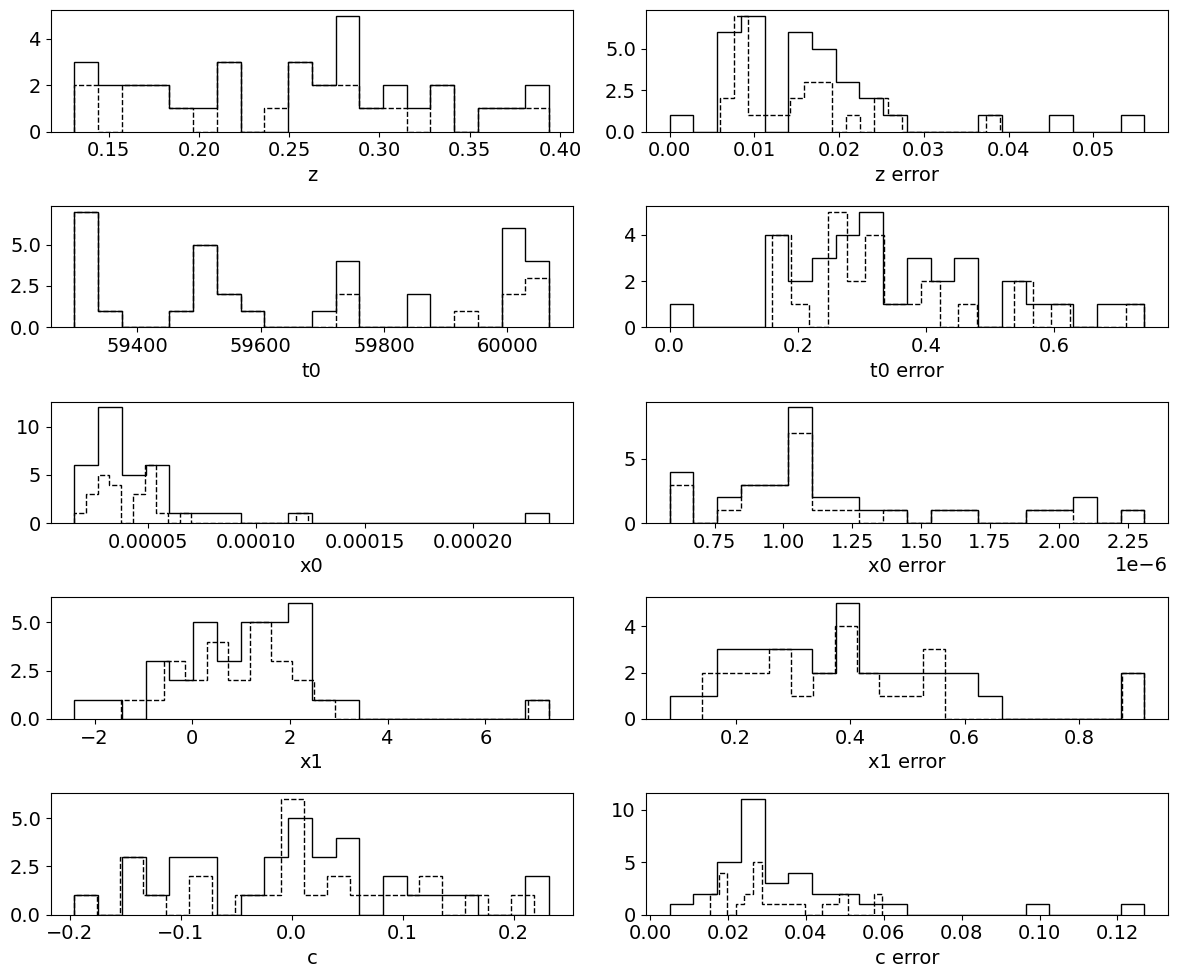

In [12]:
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0))[0]
mrx = np.where((fit_z > -90.0) & (fit_mrflag == 0))[0]

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(5, 2, figsize=(12, 10))
nbins=20

ax[0,0].hist(fit_z[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[0,0].hist(fit_z[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[0,0].set_xlabel('z')

ax[0,1].hist(fit_ze[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[0,1].hist(fit_ze[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[0,1].set_xlabel('z error')

ax[1,0].hist(fit_t0[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[1,0].hist(fit_t0[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[1,0].set_xlabel('t0')

ax[1,1].hist(fit_t0e[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[1,1].hist(fit_t0e[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[1,1].set_xlabel('t0 error')

ax[2,0].hist(fit_x0[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[2,0].hist(fit_x0[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[2,0].set_xlabel('x0')

ax[2,1].hist(fit_x0e[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[2,1].hist(fit_x0e[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[2,1].set_xlabel('x0 error')

ax[3,0].hist(fit_x1[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[3,0].hist(fit_x1[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[3,0].set_xlabel('x1')

ax[3,1].hist(fit_x1e[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[3,1].hist(fit_x1e[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[3,1].set_xlabel('x1 error')

ax[4,0].hist(fit_c[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[4,0].hist(fit_c[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[4,0].set_xlabel('c')

ax[4,1].hist(fit_ce[mlgx], bins=nbins, histtype='step', ls='solid', color='black')
ax[4,1].hist(fit_ce[mrx],  bins=nbins, histtype='step', ls='dashed', color='black')
ax[4,1].set_xlabel('c error')

fig.tight_layout()
fig.show()

## Explore candidates with outlier parameter values

For values, there's only one outlier:
 * `x0` > 0.00015
 
For errors, there are a few outliers
 * `ze` > 0.05
 * `t0e` > 2
 * `x0e` > 0.1
 * `x1e` > 0.6
 * `ce` > 0.15

Identify the candidates which have outlier values in the parameter and error distributions.

In [14]:
print('Candidates with fit outlier values')

tx_x0 = np.where((fit_mlgflag == 0) & (fit_x0 > 0.00015))[0]
print('x0: ', len(tx_x0), fit_cand[tx_x0])
del tx_x0

tx_ze  = np.where((fit_mlgflag == 0) & (fit_ze > 0.05))[0]
tx_t0e = np.where((fit_mlgflag == 0) & (fit_t0e > 2))[0]
tx_x0e = np.where((fit_mlgflag == 0) & (fit_x0e > 0.1))[0]
tx_x1e = np.where((fit_mlgflag == 0) & (fit_x1e > 0.6))[0]
tx_ce  = np.where((fit_mlgflag == 0) & (fit_ce > 0.15))[0]
print('ze: ', len(tx_ze), fit_cand[tx_ze])
print('t0e: ', len(tx_t0e), fit_cand[tx_t0e])
print('x0e: ', len(tx_x0e), fit_cand[tx_x0e])
print('x1e: ', len(tx_x1e), fit_cand[tx_x1e])
print('ce: ', len(tx_ce), fit_cand[tx_ce])
del tx_ze, tx_t0e, tx_x0e, tx_x1e, tx_ce

tx = np.where((fit_mlgflag == 0) & 
              ((fit_x0 > 0.00015) | 
               (fit_ze > 0.05) | 
               (fit_t0e > 2) | 
               (fit_x0e > 0.1) | 
               (fit_x1e > 0.6) | 
               (fit_ce > 0.15)))[0]
print('any: ', len(tx))
print('candidates: ', fit_cand[tx])
outlier_cand = fit_cand[tx]
del tx

Candidates with fit outlier values
x0:  1 ['DC22iykha']
ze:  1 ['DC22hxfom']
t0e:  0 []
x0e:  0 []
x1e:  4 ['DC21esjb' 'DC23jwvwc' 'DC23krtnc' 'DC23kwpaw']
ce:  0 []
any:  6
candidates:  ['DC21esjb' 'DC22hxfom' 'DC22iykha' 'DC23jwvwc' 'DC23krtnc' 'DC23kwpaw']


<img src="1_all_potential_snia_lcs/DC22iykha.png" width="400"/><br>
<img src="1_all_potential_snia_lcs/DC22hxfom.png" width="400"/><br>
<img src="1_all_potential_snia_lcs/DC21esjb.png" width="400"/><br>
<img src="1_all_potential_snia_lcs/DC23jwvwc.png" width="400"/><br>
<img src="1_all_potential_snia_lcs/DC23krtnc.png" width="400"/><br>
<img src="1_all_potential_snia_lcs/DC23kwpaw.png" width="400"/><br>


In [15]:
for cand in outlier_cand:
    print(cand)
    cx = np.where(fit_cand == cand)[0]
    print(fit_in_zlo[cx[0]], fit_in_zhi[cx[0]])
    print(fit_z[cx[0]],  fit_ze[cx[0]])
    print(fit_t0[cx[0]], fit_t0e[cx[0]])
    print(fit_x0[cx[0]], fit_x0e[cx[0]])
    print(fit_x1[cx[0]], fit_x1e[cx[0]])
    print(fit_c[cx[0]],  fit_ce[cx[0]])
    print(fit_pmB[cx[0]], fit_pmg[cx[0]], fit_pmr[cx[0]], fit_pmi[cx[0]])
    print(' ')

DC21esjb
0.235 0.535
0.367 0.017
60021.35 0.74
2.3865e-05 1.0859e-06
1.129 0.8956
-0.146 0.0319
22.0546 22.1534 22.4369 23.0908
 
DC22hxfom
0.209 0.509
0.315 0.056
59752.4 0.42
2.8488e-05 1.2885e-06
-0.2828 0.5454
-0.0932 0.1269
21.8654 21.9494 22.1441 22.757
 
DC22iykha
0.05 0.35
0.146 0.0
59871.82 0.0
0.00023485 1.4082e-06
2.0407 0.0849
-0.1059 0.005
19.5695 19.655 19.9087 20.556
 
DC23jwvwc
0.161 0.461
0.278 0.022
59699.97 0.54
3.7093e-05 1.0484e-06
0.4936 0.6106
0.0208 0.037
21.5774 21.6269 21.7 22.2751
 
DC23krtnc
0.195 0.495
0.276 0.025
60067.8 0.62
3.0266e-05 1.9964e-06
2.1244 0.9133
0.0401 0.0506
21.7933 21.8351 21.9181 22.5038
 
DC23kwpaw
0.205 0.505
0.28 0.039
60059.64 0.7
2.6955e-05 8.2371e-07
2.3895 0.6299
0.0452 0.0657
21.9178 21.9577 22.0404 22.6264
 


## Summary

The outliers all seem to have non-SNIa-like colors.
It's reasonable that they all end up as outliers.
